In [1]:
import mlgrad.mlocation_scatter as mls
import mlgrad.avragg as avragg
import mlgrad.distance as distance
import mlgrad.func as func

from mlgrad import erm_fg, erm_sg, erm_irgd, fg, fg_rud, sg, weights, averager_it, erisk

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib import rcsetup
plt.style.use(['seaborn-notebook', 'seaborn-white', 'seaborn-ticks'])

from sklearn.datasets import load_boston
# rcsetup.defaultParams['font.size'][0] = 12
# rcsetup.defaultParams
# plt.style.available

In [2]:
X, Y = load_boston(True)
print(X.shape, Y.shape)
names = ['p' + str(i+1) for i in range(13)]

(506, 13) (506,)


In [3]:
avg = avragg.MWAverage(averager_it(func.QuantileFunc(0.90, func.Sqrt(0.001))))
mlse = mls.MLocationScatterEstimator(avg, n_iter=30, h=0.1)
mlse.fit(X)

[162.46646069659852, 160.06423684790255, 159.42555730484403, 158.62841982724763, 161.8300782180056, 158.6307202139374, 158.62247074755834, 158.62660762150438, 158.63255046274747, 158.63676303271362]


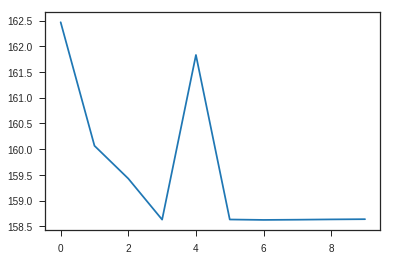

In [4]:
print(mlse.dvals)
plt.plot(mlse.dvals)
plt.show()

In [5]:
loc, sc = mlse.loc, mlse.S
distfunc = mlse.distfunc

In [6]:
# print(loc.base)
# print(mlse.S.base)
# print(mlse.K)

In [7]:
# plt.figure(figsize=(5.0, 4.0))
# plt.scatter(X, Y, s=49, c='w', edgecolors='k', linewidth=1.)
# plt.scatter([loc[0]], [loc[1]], s=49, c='k', edgecolors='k', linewidth=1., marker='o', label='robust')
# plt.scatter([loc0[0]], [loc0[1]], s=49, c='k', edgecolors='k', linewidth=1., marker='s', label='standard')
# plt.minorticks_on()
# plt.grid(1)
# plt.legend()
# plt.show()

In [8]:
loc, S = mlse.loc.base, mlse.S.base
distfunc = mlse.distfunc

loc0 = mls.standard_location(X)
S0 = mls.standard_covariance(X, loc0)
# S0 = np.linalg.inv(S0)
print(loc0)
print(loc)

[3.61352356e+00 1.13636364e+01 1.11367787e+01 6.91699605e-02
 5.54695059e-01 6.28463439e+00 6.85749012e+01 3.79504269e+00
 9.54940711e+00 4.08237154e+02 1.84555336e+01 3.56674032e+02
 1.26530632e+01]
[2.52478849e+00 1.28645213e+01 1.04266402e+01 7.85788501e-02
 5.49990521e-01 6.38039737e+00 6.62973186e+01 3.87742423e+00
 9.39804231e+00 4.04133630e+02 1.83143801e+01 3.61027062e+02
 1.18646627e+01]


In [9]:
with np.printoptions(precision=1, suppress=True, linewidth=120):
    print(np.linalg.inv(S))
    
#np.set_printoptions()

[[   3.    -0.1    0.     2.    -0.1   -1.2    0.     0.7   -1.1   -0.    -0.1    0.    -0.4]
 [  -0.1    0.1    0.1   -0.2   -0.8   -0.3    0.    -0.4    0.1   -0.     0.1    0.    -0. ]
 [   0.     0.1    1.5   -2.5  -20.7    1.2    0.     0.8    0.5   -0.1   -0.2    0.    -0.1]
 [   2.    -0.2   -2.5  204.   -76.4    5.    -0.2   -0.1   -3.3    0.2    2.3   -0.     1.1]
 [  -0.1   -0.8  -20.7  -76.4 3483.9   38.4   -4.    39.1   -1.9   -0.4   30.3   -0.    -1.7]
 [  -1.2   -0.3    1.2    5.    38.4   66.1   -0.5    5.2   -1.7    0.1    3.8    0.     4.2]
 [   0.     0.     0.    -0.2   -4.    -0.5    0.1    0.2    0.    -0.    -0.    -0.    -0.1]
 [   0.7   -0.4    0.8   -0.1   39.1    5.2    0.2   10.    -0.1   -0.    -1.1   -0.    -0.1]
 [  -1.1    0.1    0.5   -3.3   -1.9   -1.7    0.    -0.1    2.1   -0.1   -0.2    0.     0.1]
 [  -0.    -0.    -0.1    0.2   -0.4    0.1   -0.    -0.    -0.1    0.    -0.     0.     0. ]
 [  -0.1    0.1   -0.2    2.3   30.3    3.8   -0.    -1.1   

In [10]:
distfunc = distance.MahalanobisDistance(np.linalg.inv(S))
distfunc0 = distance.MahalanobisDistance(np.linalg.inv(S0))

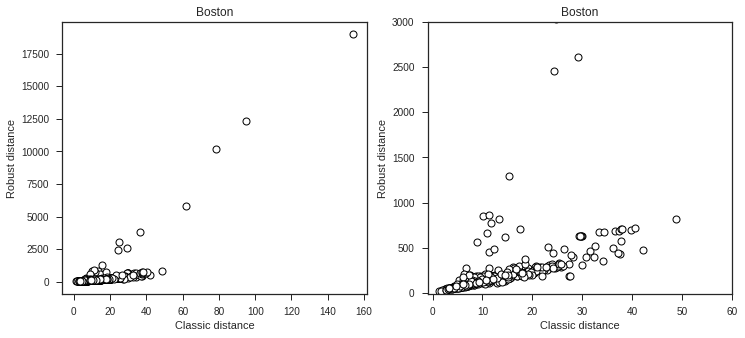

In [15]:
plt.figure(figsize=(12.0, 5.0))
plt.subplot(1,2,1)
D0 = [distfunc0(x, loc0) for x in X]
D = [mlse.distfunc(x, loc) for x in X]
plt.scatter(D0, D, c='w', edgecolor='k', linewidth=1)
plt.xlabel('Classic distance')
plt.ylabel('Robust distance')
plt.title('Boston')
plt.subplot(1,2,2)
D0 = [distfunc0(x, loc0) for x in X]
D = [mlse.distfunc(x, loc) for x in X]
plt.scatter(D0, D, c='w', edgecolor='k', linewidth=1)
plt.xlabel('Classic distance')
plt.ylabel('Robust distance')
plt.title('Boston')
plt.ylim(-10, 3000)
plt.xlim(-1, 60)
plt.savefig('fig/robust_location_scatter_boston.eps')
plt.show()